
# Project: Investigate a Dataset 

## Data set: No Show Appointments
###  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data source - No show appointments

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the
####  question of whether or not patients show up for their appointment

#### This exploratory data analysis focuses on following question pertaining to above data set

#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [296]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### This section will focus on data wrangling process of three steps - 
#### 1. Gather - Data is already available in the form of csv
#### 2. Assess - Both programmatic and visual
#### 3. Clean -  Improving quality and tidyness 

In [297]:
# Gather data
df = pd.read_csv('NoShowAppointments.csv')


### Visual and Programmatic Assessment

In [138]:
# check general info
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show,WaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
# The column names No-show and SMS_received are not consistent in naming
# also as clear in data No-show - no means a show up in appointment. This is a bit difficult to understand

In [10]:
# check for null values
df.isnull().values.any()

False

In [ ]:
# data has no null values

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [133]:
# check for duplicates 
df.duplicated().any()

False

In [ ]:
# no duplicates to remove..

In [160]:
# we see above that -1 is an age related edge case that can be removed from the analysis. 
print(df.Age[df.Age <= 0].count())


3540
1


In [ ]:
# There are total 3540 records with 0 age. They should be removed

In [299]:
# also age above 100 seems to be in edge case scenario.. Let's see the values
df[df.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [ ]:
# The records above age 100 are very small number and do not add any value to our analysis 
# should be removed

## Data Cleaning

### Assessment findings 

#### 1. Rename columns with inconsistent hyphens and incorrect spelling
#### 2. Invert No-Show to Show for clarity purposes
#### 3. Handcap column has irrelevant catgories in context of this analysis, hence to be removed
#### 4. Remove data with Age as 0 and -1 and above 100
#### 5. Age binning will be important to understand age related differences, however this will be performed on a dataframe copy
#### so as to keep original dataframe for other categorical data analysis


In [326]:
dfc = df.copy()

In [327]:
# Columns rename
dfc.rename(columns={"No-show": "Show", "SMS_received": "SMSReceived", "Handcap" : "Handicap", "Hipertension" : "Hypertension"}, inplace=True)
dfc.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [328]:
# Replace the values of Show columns to correct numerics
dfc["Show"].replace({"Yes": "0", "No": "1"}, inplace=True)
dfc['Show'] = pd.to_numeric(dfc['Show'])

In [329]:
# Having Handicap or not
# is of interest to us for analysis purposes

dfc['Handicap'].replace({2:1,3:1,4:1}, inplace = True)

In [330]:
dfc['Handicap'].unique()

array([0, 1])

In [205]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  Show          

In [331]:
df_final = dfc.drop(dfc[dfc.Age <= 0].index)

In [332]:
df_final.reset_index(drop=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
106983,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
106984,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
106985,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [333]:
df_final = df_final.drop(df_final[df_final.Age > 100].index)

In [334]:
df_final.reset_index(drop=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106975,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
106976,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
106977,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
106978,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [335]:
df_final.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
count,1.069800e+05,1.069800e+05,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000
mean,1.472737e+14,5.675433e+06,38.311311,0.101038,0.203776,0.074248,0.031408,0.020901,0.323275,0.797373
std,2.558145e+14,7.133332e+04,22.459144,0.301380,0.402807,0.262175,0.174418,0.143054,0.467729,0.401958
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173120e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.433573e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# this completes our Data Cleaning process


## Exploratory Data Analysis

### This phase attempts to explore and analyse the data and 
### relationship between its various properties in context of Research Questions




### Research Question 1 (Does Gender play a role in No-Show appointments?)

In [210]:
dfm = df_final.query("Gender == 'M'")
dfmg = dfm.groupby(['Gender'])['Show'].value_counts(normalize = True)
dfmg

Gender  Show
M       1       0.799154
        0       0.200846
Name: Show, dtype: float64

In [211]:
dff = df_final.query("Gender == 'F'")
dffg = dff.groupby(['Gender'])['Show'].value_counts(normalize = True)
dffg

Gender  Show
F       1       0.796415
        0       0.203585
Name: Show, dtype: float64

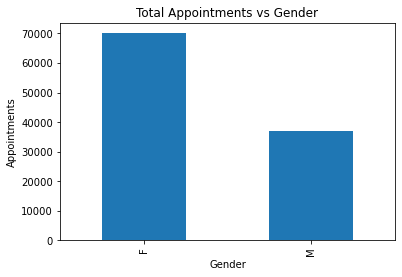

In [212]:
# total appointments made per gender
dft = df_final.groupby(['Gender']).size()
ax = dft.plot.bar(title = 'Total Appointments vs Gender')

# set labels for both axes
ax.set(xlabel='Gender', ylabel='Appointments')
plt.show()

In [ ]:
# As clear from above, the total female appointments are more than male appointments, almost double

Text(0.5, 1.0, 'Male -show/no-show in percentage')

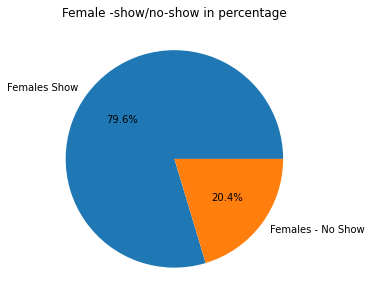

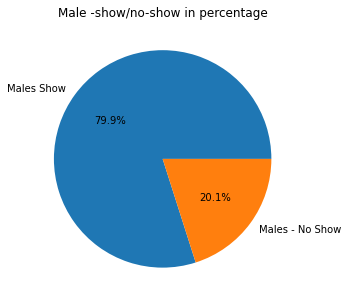

In [213]:
# Rate of Show/No Show based on Gender

labels = ["Females Show", "Females - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dffg,labels = labels, autopct = '%1.1f%%')
plt.title('Female -show/no-show in percentage')

labels = ["Males Show", "Males - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dfmg, labels = labels, autopct = '%1.1f%%')
plt.title('Male -show/no-show in percentage')

In [ ]:
# as apparent from above, rate of show up for males is slightly higer than females

### Research Question 2 
####  Does a specific Age Group has higher Show up rate than others?


In [ ]:
# first of all, age group binning is required on the data

In [340]:
age_bins=[0,10,20,30,40,50,60,70,80,90,100] 

age_cat=['0-10', '10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

newAgeDf = df_final.copy()

newAgeDf['Age categories']= pd.cut(newAgeDf['Age'],age_bins,labels=age_cat)


In [341]:
newAgeDf.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Show
count,1.069800e+05,1.069800e+05,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000
mean,1.472737e+14,5.675433e+06,38.311311,0.101038,0.203776,0.074248,0.031408,0.020901,0.323275,0.797373
std,2.558145e+14,7.133332e+04,22.459144,0.301380,0.402807,0.262175,0.174418,0.143054,0.467729,0.401958
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173120e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.433573e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
newAgeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hypertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handicap        106987 non-null  int64              
 12  SMSReceived     106987 non-null  int64              
 13  Show          

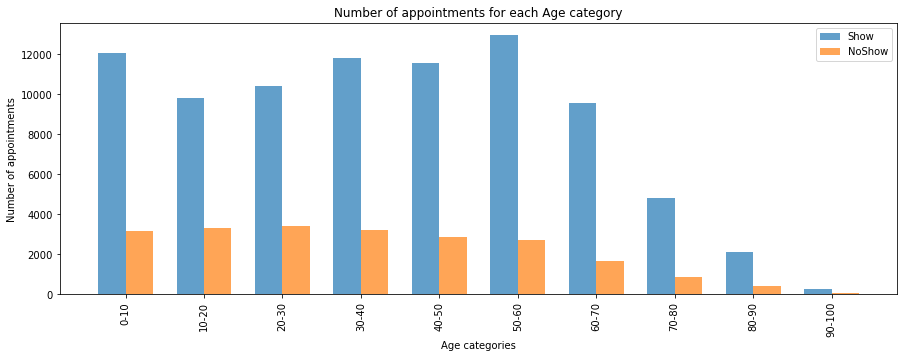

In [342]:
# Count of appointments for show/no-show with respect to age groups

temp1 = newAgeDf[newAgeDf['Show']==1] 
temp0 = newAgeDf[newAgeDf['Show']==0] 


dfShow = (temp1.groupby('Age categories')['Show'].count()).values
dfNoShow = (temp0.groupby('Age categories')['Show'].count()).values

numBins =np.arange(10)
width=.35

#plotting both in the same graph.

plt.bar(numBins, dfShow, width,  alpha=.7, label='Show');
plt.bar(numBins + width, dfNoShow, width, alpha=.7, label='NoShow');
locations = numBins + width / 2
labels =  [ '0-10', '10-20', '20-30', '30-40',
                  '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'];
plt.xticks(locations, labels,rotation='vertical');
plt.xlabel('Age categories');
plt.ylabel('Number of appointments');
plt.title('Number of appointments for each Age category');
plt.legend();

In [ ]:
# In above plot, we can see that number of appointments tend to decrease as we move towards older than 60 age groups
# High number of appointemnts are made till the age group 60
# Age group 0-10 and 50-60 have higest number of appointments


In [343]:
percent = newAgeDf.groupby('Age categories')['Show'].value_counts(normalize=True).mul(100)
percent


Age categories  Show
0-10            1       79.296515
                0       20.703485
10-20           1       74.746164
                0       25.253836
20-30           1       75.375463
                0       24.624537
30-40           1       78.527770
                0       21.472230
40-50           1       80.097087
                0       19.902913
50-60           1       82.625631
                0       17.374369
60-70           1       85.271249
                0       14.728751
70-80           1       84.460759
                0       15.539241
80-90           1       84.001572
                0       15.998428
90-100          1       80.398671
                0       19.601329
Name: Show, dtype: float64

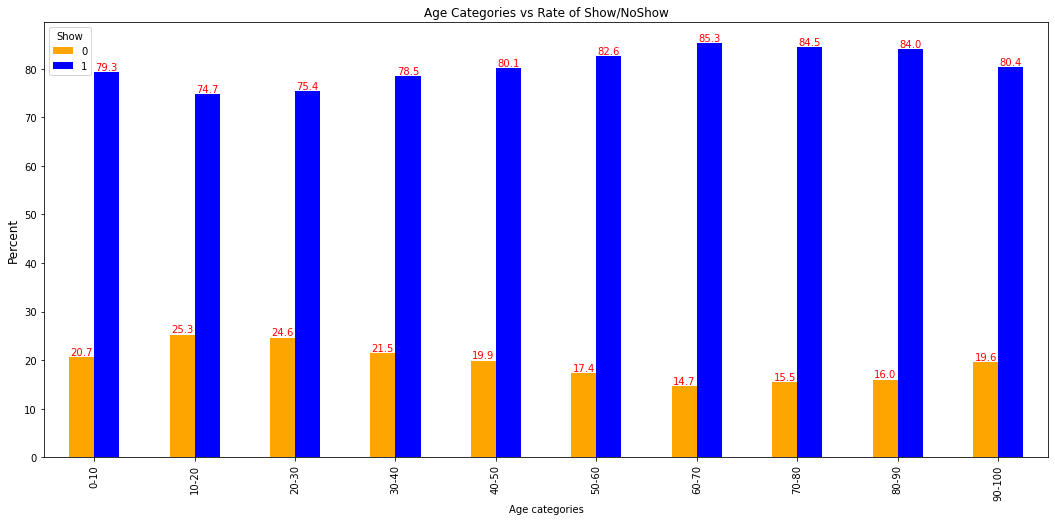

In [351]:
# plot the rate of percentage

ax = percent.unstack('Show').plot.bar(color = ['orange', 'blue'], rot=90, 
                                      title = 'Age Categories vs Rate of Show/NoShow')
ax.set_ylabel("Percent", fontsize=12)
plt.rcParams["figure.figsize"] = (15,10)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()

In [ ]:
# from the above graph, its clear that the No show rates are slightly higher in age group 10-30
# the no show rates tend to lower towards the older age grup that is more than 40
# show rates are slightly higher in the age groups 40 to 80

### Research Question 3 
####  What impact SMSReceived play in show/no show rates?


In [352]:
dfse = df_final.query("SMSReceived == 1")['Show'].value_counts(normalize = True)
dfse

1    0.72334
0    0.27666
Name: Show, dtype: float64

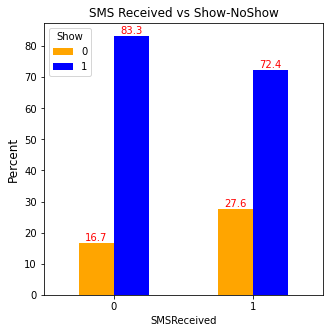

In [354]:
ax = new_df.unstack('Show').mul(100).plot.bar(rot=0, color = ['orange', 'blue'], title = 'SMS Received vs Show-NoShow')
ax.set_ylabel("Percent", fontsize=12)
plt.rcParams["figure.figsize"] = (5,5)
bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()


In [275]:
# Above graph indicates that rate of not showing up is higher in those who received SMS as compared 
# to those who did not receive. This looks a bit peculiar and cannot be concluded from the data we have
# we need to explore other factors. SMSReceived alone does not affect the rate of show/no-show




### Research Question 4: Does a specific comoribidity affect Show-NoShow Rate?


<Figure size 2160x1440 with 0 Axes>

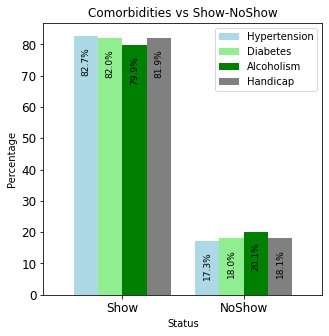

In [355]:
per_hyp = df_final[df_final['Hypertension'] == 1]['Show'].value_counts(normalize=True)*100
per_dia = df_final[df_final['Diabetes'] == 1]['Show'].value_counts(normalize=True)*100
per_alc = df_final[df_final['Alcoholism'] == 1]['Show'].value_counts(normalize=True)*100
per_hand = df_final[df_final['Handicap'] == 1]['Show'].value_counts(normalize=True)*100
    
newdf = pd.DataFrame(
    {'Status': x_labels,
     'Hypertension': per_hyp,
     'Diabetes': per_dia,
     'Alcoholism' : per_alc,
     'Handicap': per_hand
    })
plt.figure(figsize=(30,20))
ax = newdf.plot(x= "Status", y=["Hypertension", "Diabetes", "Alcoholism", "Handicap"], kind="bar", 
                color = ['lightblue', 'lightgreen', 'green', 'grey'],
               width = .8, rot = 0, fontsize = 12)

ax.set_ylabel('Percentage')
ax.set_title('Comorbidities vs Show-NoShow')
ax.set_xticklabels(x_labels)
ax.legend()

for p in ax.patches:
   
    x = p.get_x() + .1
    y = p.get_height() - 12
    ax.text(x, y , "{:.1f}".format(p.get_height()) + "%",
            fontsize=9,
            ha='center',
            rotation='vertical')


<a id='conclusions'></a>
## Conclusions

### Research Question 1 (Does Gender play a role in No-Show appointments?)

1. Total number of appointments for females are almost twice than that of taken by males 
2. Show-up rate for females are lower than male show-up rate by very low margin. We can say they are almost similar. However the data given here is not sufficient to understand the specific profile of genders to generalize. 

### Research Question 2 
####  Does a specific Age Group has higher Show up rate than others?

1. No-show rates are slightly higher in age group 10-30
2. No-show rates tend to lower towards the older age group (40 and above)

### Research Question 3 
####  What impact SMSReceived play in show/no show rates?

1. From the small analysis, it was tendencial that people who received SMS tend to have higher NoShow rates or Lower show-up rates. This needs to be explored further because this cannot be concluded clearly only analysing data for two variables - SMSReceived and Show/NoShow. This analysis here is limited in that respect and further exploration with other variables (Waiting Time between Scheduled Day and Appointment Day) should be performed

### Research Question 4
#### Does a specific comoribidity affect Show-NoShow Rate?

1. From the given four comorbidities - Hypertension, Diabetes, Alcoholism and Handicap, people with Alcoholism show slightly higher rate of No-Shows. 
2. People with Hypertension, Diabetes and Handicap tend to have similar rate of Showing up, slightly on the higher side of 80%
